# 1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import time
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from num2words import num2words


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 2. Data Acquisition -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL

Size of the dataset: 49581

Type of data attributes:
review       object
sentiment    object
dtype: object

Data attributes: ['review', 'sentiment']

Classifying: ['positive' 'negative']


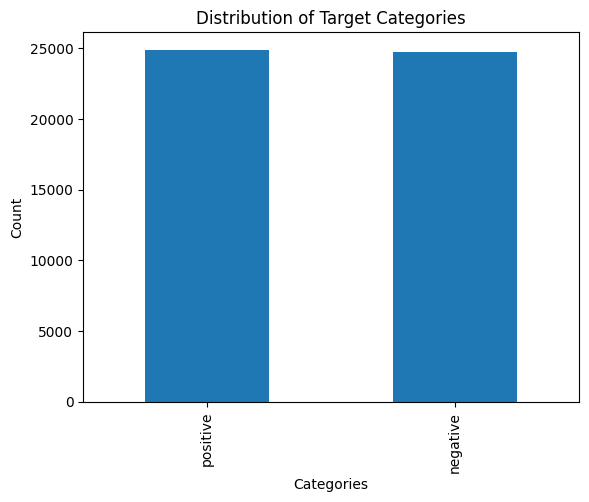

In [2]:
# Read the CSV file
data = pd.read_csv('IMDB Dataset.csv')

# Size of the dataset
dataset_size = data.shape[0]  # Number of rows in the dataset
print("Size of the dataset:", dataset_size)

# Data attributes and their types
data_attributes = data.dtypes
print("\nType of data attributes:")
print(data_attributes)

# Data attributes
data_attributes = list(data.columns)
print("\nData attributes:", data_attributes)

# Target variable
target_variable = 'sentiment'  # Replace with the actual name of the target column
target_classes = data[target_variable].unique()

# What are you classifying?
print("\nClassifying:", target_classes)

# Plot the distribution of target categories
data[target_variable].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories')
plt.show()


## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 

This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [3]:
# Check for duplicate data
print("Number of duplicate rows before preprocessing:", data.duplicated().sum())

# Remove duplicate data
data.drop_duplicates(inplace=True)

# Check for missing data
print("Number of missing values before preprocessing:")
print(data.isnull().sum())

# Impute or remove missing data
# Option 1: Remove rows with missing values
data.dropna(inplace=True)

# Option 2: Impute missing values with mean or median
# Uncomment the following lines to use mean imputation
# data.fillna(data.mean(), inplace=True)

# Option 3: Impute missing values with mode (for categorical variables)
# Uncomment the following lines to use mode imputation
# data.fillna(data.mode().iloc[0], inplace=True)

# Check for data inconsistencies and perform necessary corrections
# Option 1: Manual correction based on specific rules
# Uncomment the following lines and modify as per your requirements
# data['column_name'] = data['column_name'].apply(lambda x: x.replace('incorrect_value', 'correct_value'))

# Option 2: Use regular expressions for pattern matching and correction
# Uncomment the following lines and modify as per your requirements
# import re
# data['column_name'] = data['column_name'].apply(lambda x: re.sub(r'pattern', 'replacement', x))

# Check the preprocessed dataset
print("Number of duplicate rows after preprocessing:", data.duplicated().sum())
print("Number of missing values after preprocessing:")
print(data.isnull().sum())


Number of duplicate rows before preprocessing: 0
Number of missing values before preprocessing:
review       0
sentiment    0
dtype: int64
Number of duplicate rows after preprocessing: 0
Number of missing values after preprocessing:
review       0
sentiment    0
dtype: int64


In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49576,I thought this movie did a down right good job...,positive
49577,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49578,I am a Catholic taught in parochial elementary...,negative
49579,I'm going to have to disagree with the previou...,negative


In [5]:
# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_tokens)

# Function for stemming
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_tokens)

# Function for vectorization
def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    text_features = vectorizer.fit_transform(text)
    return text_features

# Function for preprocess the text
def preprocess_text(text, lower_case=True, convert_numbers=True, remove_punctuation=True,
                    remove_accents=True, remove_whitespace=True, expand_abbreviations=False,
                    remove_stopwords=True, sparse_terms=[], specific_words=[]):
    
    # Convert all letters to lower or upper case
    if lower_case:
        text = text.lower()
    else:
        text = text.upper()

    # Converting numbers into words or removing numbers
    if convert_numbers:
        # Replace numbers with their word equivalents using num2words library
        tokens = []
        for word in text.split():
            if word.isdigit():
                word = num2words(int(word))
            tokens.append(word)
        text = ' '.join(tokens)
    else:
        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

    # Removing punctuations, accent marks, and other diacritics
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    if remove_accents:
        text = ''.join(c for c in unicodedata.normalize('NFD', text)
                       if not unicodedata.combining(c))

    # Removing white spaces
    if remove_whitespace:
        text = re.sub(r'\s+', ' ', text.strip())

    # Expanding abbreviations
    if expand_abbreviations:
        abbreviations = {'e.g.': 'for example', 'i.e.': 'that is', 'etc.': 'et cetera'}
        for abbr, expanded in abbreviations.items():
            text = text.replace(abbr, expanded)

    # Removing stop words, sparse terms, and specific words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(word for word in text.split() if word not in sparse_terms)
    text = ' '.join(word for word in text.split() if word not in specific_words)

    return text


# Apply the preprocessing function to a specific column
text_col = 'review'  # Specify the text column to preprocess
data['text'] = data[text_col].apply(preprocess_text)

# Apply lemmatization to a specific column
text_col = 'text'  # Specify the text column to preprocess
data[text_col] = data[text_col].apply(lemmatize_text)

# # Apply stemming to a specific column
# text_col = 'text'  # Specify the text column to preprocess
# data[text_col] = data[text_col].apply(stem_text)

# # Apply vectorization to a specific column
# text_col = 'text'  # Specify the text column to preprocess
# text_features = vectorize_text(data[text_col])

# Check the preprocessed dataset and vectorized features
display(data.head())

# display(text_features.toarray())
start_time = time.time()
# # Save the preprocessed dataset
data.to_csv('preprocessed_IMDB_Dataset.csv', index=False)

end_time = time.time() - start_time
print("Time taken for text preprocessing: ", end_time)

,review,sentiment,text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching one oz episode...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


Time taken for text preprocessing:  2.353074550628662


# 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [7]:
# Preprocessing: Convert the labels to numeric values
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# # Due to avability of limited processing (unavailability of GPU) we are using 10k records for further analysis and prediction 
# data = data.head(500)
# print(data['sentiment'].value_counts(normalize = True)*100)

# Preprocessing: Split the dataset into input features and labels
X = data['text']
y = data['sentiment']


# 3.3 Split the data into training set and testing set

In [8]:
# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Consider top 5000 most frequent words
X = vectorizer.fit_transform(X).toarray()

# Padding sequences
max_sequence_length = X.shape[1]  # Choose the sequence length based on the vectorized features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39664, 5000)
y_train shape: (39664,)
X_test shape: (9917, 5000)
y_test shape: (9917,)


# 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


# 4. Deep Neural Network Architecture - Score:  Marks
## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [9]:
# Define the DNN model architecture
model = keras.models.Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


# 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [10]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 322,689
Trainable params: 322,689
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model - Score: 1 Mark

# 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])


# 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [12]:
from sklearn.model_selection import train_test_split, KFold

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with cross-validation
start_time = time.time()
epochs = 20
kf = KFold(n_splits=5)
fold = 1
cv_scores = []
history = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold),callbacks=[early_stopping])
    history.append(fold_history)
    
    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")


Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5018
Fold 2
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 3
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4991
Fold 4
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 5
248/248 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4884
Fold 1 Accuracy: 0.5018278360366821
Fold 2 Accuracy: 0.4946426451206207
Fold 3 Accuracy: 0.49905458092689514
Fold 4 Accuracy: 0.4946426451206207
Fold 5 Accuracy: 0.4884014129638672
Mean Accuracy: 0.4957138240337372
Total Time Taken: 89.3693745136261 seconds


### Justify your choice of optimizers and regulizations used and the hyperparameters tuned

# 6. Test the model - 0.5 marks


In [13]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Convert probabilities to binary predictions


310/310 [==============================] - 0s 951us/step


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


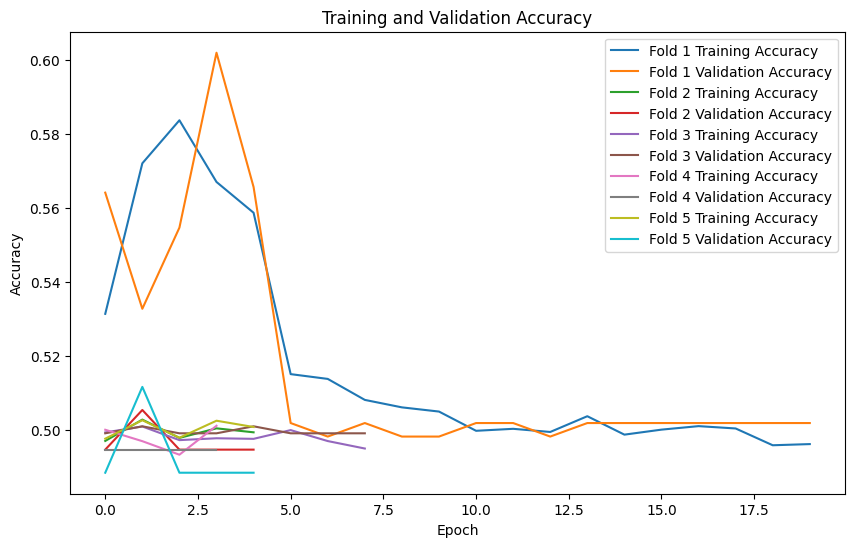

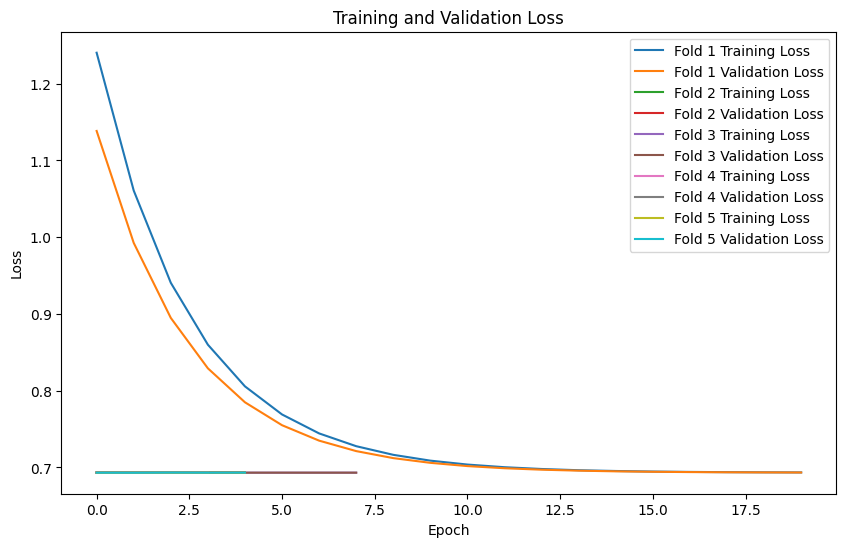

Confusion Matrix:
[[4880    0]
 [5037    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4880
           1       0.00      0.00      0.00      5037

    accuracy                           0.49      9917
   macro avg       0.25      0.50      0.33      9917
weighted avg       0.24      0.49      0.32      9917



In [14]:
# 1. Plot the training and validation accuracy history
plt.figure(figsize=(10, 6))
for i, fold_history in enumerate(history):
    plt.plot(fold_history.history['accuracy'], label=f"Fold {i+1} Training Accuracy")
    plt.plot(fold_history.history['val_accuracy'], label=f"Fold {i+1} Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2. Plot the training and validation loss history
plt.figure(figsize=(10, 6))
for i, fold_history in enumerate(history):
    plt.plot(fold_history.history['loss'], label=f"Fold {i+1} Training Loss")
    plt.plot(fold_history.history['val_loss'], label=f"Fold {i+1} Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 3. Report the testing accuracy and loss
## given below

# 4. Show Confusion Matrix for testing dataset
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# 5. Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


#### 3. Report the testing accuracy and loss.

# 8. Model architecture - Score: 1 mark
Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Training Deep Neural Network (DNN) model...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5018
Fold 2
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 3
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4991
Fold 4
248/248 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4946
Fold 5
248/248 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4884
Fold 1 Accuracy: 0.5018278360366821
Fold 2 Accuracy: 0.4946426451206207
Fold 3 Accuracy: 0.49905458092689514
Fold 4 Accuracy: 0.4946426451206207
Fold 5 Accuracy: 0.4884014129638672
Mean Accuracy: 0.4957138240337372
Total Time Taken: 88.49536037445068 seconds

Training Deep Neural Network (DNN) model by decreasing one layer...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.8056
Fold 2
248/248 [==============================] - 0

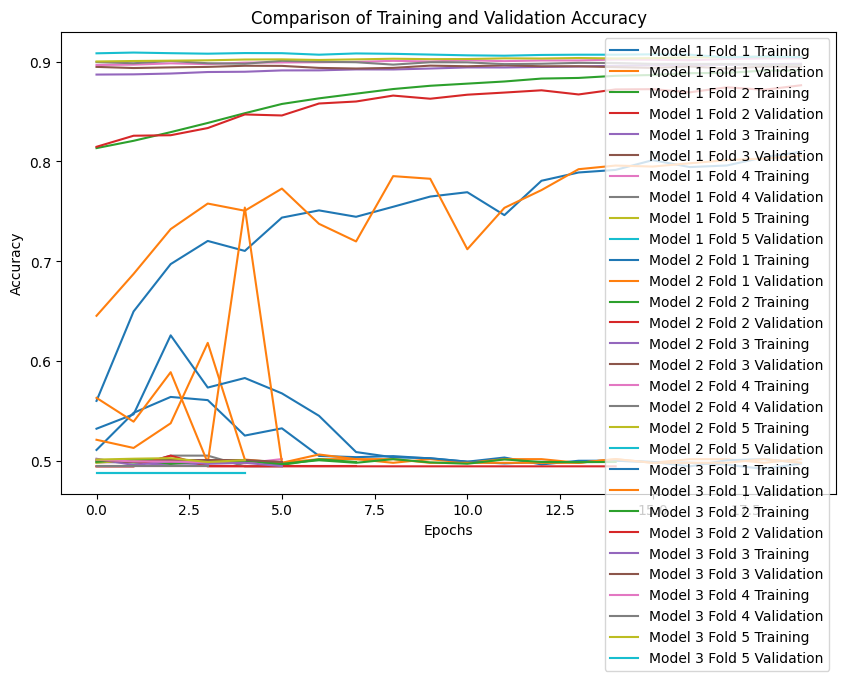

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Deep Neural Network
print("\nTraining Deep Neural Network (DNN) model...")
model1_accuracy_scores = []
model1_histories = []  # Store the history for each fold

# Define the DNN model architecture
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with cross-validation
start_time = time.time()
epochs = 20
kf = KFold(n_splits=5)
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model1.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model1_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model1.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 2: by decreasing one layer
print("\nTraining Deep Neural Network (DNN) model by decreasing one layer...")
model2_accuracy_scores = []
model2_histories = []  # Store the history for each fold

# Define the DNN model architecture
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model2.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model2_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 3: by increasing one layer
print("\nTraining Deep Neural Network (DNN) model by increasing one layer...")
model3_accuracy_scores = []
model3_histories = []  # Store the history for each fold

# Define the DNN model architecture
model3 = Sequential()
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model3.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model3_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model3.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Plot the comparison of training and validation accuracy for all models
plt.figure(figsize=(10, 6))

# Plot Model 1
for i, history in enumerate(model1_histories):
    plt.plot(history['accuracy'], label=f"Model 1 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 1 Fold {i+1} Validation")

# Plot Model 2
for i, history in enumerate(model2_histories):
    plt.plot(history['accuracy'], label=f"Model 2 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 2 Fold {i+1} Validation")

# Plot Model 3
for i, history in enumerate(model3_histories):
    plt.plot(history['accuracy'], label=f"Model 3 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 3 Fold {i+1} Validation")

plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Training Deep Neural Network (DNN) model...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4982
Fold 2
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 3
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4991
Fold 4
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 5
248/248 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4884
Fold 1 Accuracy: 0.49817219376564026
Fold 2 Accuracy: 0.4946426451206207
Fold 3 Accuracy: 0.49905458092689514
Fold 4 Accuracy: 0.4946426451206207
Fold 5 Accuracy: 0.4884014129638672
Mean Accuracy: 0.4949826955795288
Total Time Taken: 109.40027499198914 seconds

Training Deep Neural Network (DNN) model with Dropout of ratio 0.25...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5018
Fold 2
248/248 [==============================

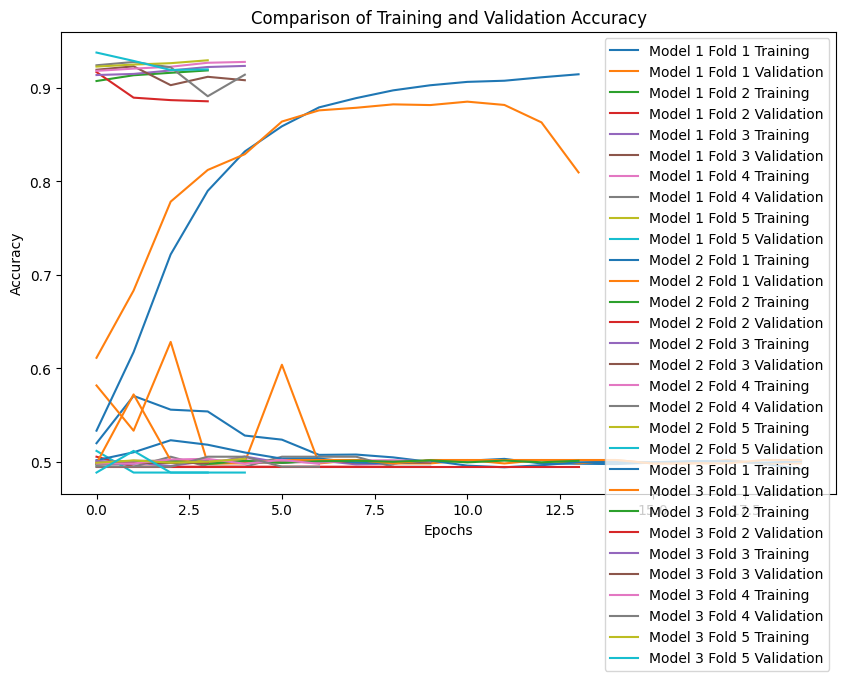

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Deep Neural Network
print("\nTraining Deep Neural Network (DNN) model...")
model1_accuracy_scores = []
model1_histories = []  # Store the history for each fold

# Define the DNN model architecture
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with cross-validation
start_time = time.time()
epochs = 20
kf = KFold(n_splits=5)
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model1.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model1_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model1.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 2: Dropout of ratio 0.25
print("\nTraining Deep Neural Network (DNN) model with Dropout of ratio 0.25...")
model2_histories = []  # Store the history for each fold

# Define the DNN model architecture
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.25))  # Dropout layer with a dropout rate of 0.25
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.25))  # Dropout layer with a dropout rate of 0.25
model2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model2.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model2_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 3: by increasing one layer
print("\nTraining Deep Neural Network (DNN) model by increasing one layer...")
model3_accuracy_scores = []
model3_histories = []  # Store the history for each fold

# Define the DNN model architecture
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.25))  # Dropout layer with a dropout rate of 0.25
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-04)))
model2.add(Dropout(0.25))  # Dropout layer with a dropout rate of 0.25
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-04)))
model3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(1e-04)))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model3.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model3_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model3.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Plot the comparison of training and validation accuracy for all models
plt.figure(figsize=(10, 6))

# Plot Model 1
for i, history in enumerate(model1_histories):
    plt.plot(history['accuracy'], label=f"Model 1 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 1 Fold {i+1} Validation")

# Plot Model 2
for i, history in enumerate(model2_histories):
    plt.plot(history['accuracy'], label=f"Model 2 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 2 Fold {i+1} Validation")

# Plot Model 3
for i, history in enumerate(model3_histories):
    plt.plot(history['accuracy'], label=f"Model 3 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 3 Fold {i+1} Validation")

plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Training Deep Neural Network (DNN) model...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5018
Fold 2
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 3
248/248 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5009
Fold 4
248/248 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4946
Fold 5
248/248 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4884
Fold 1 Accuracy: 0.5018278360366821
Fold 2 Accuracy: 0.4946426451206207
Fold 3 Accuracy: 0.5009453892707825
Fold 4 Accuracy: 0.4946426451206207
Fold 5 Accuracy: 0.4884014129638672
Mean Accuracy: 0.49609198570251467
Total Time Taken: 119.06468844413757 seconds

Training Deep Neural Network (DNN) model with RMSProp with your choice of hyper parameters...
Fold 1
248/248 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8871
Fold 2
248/248 [========

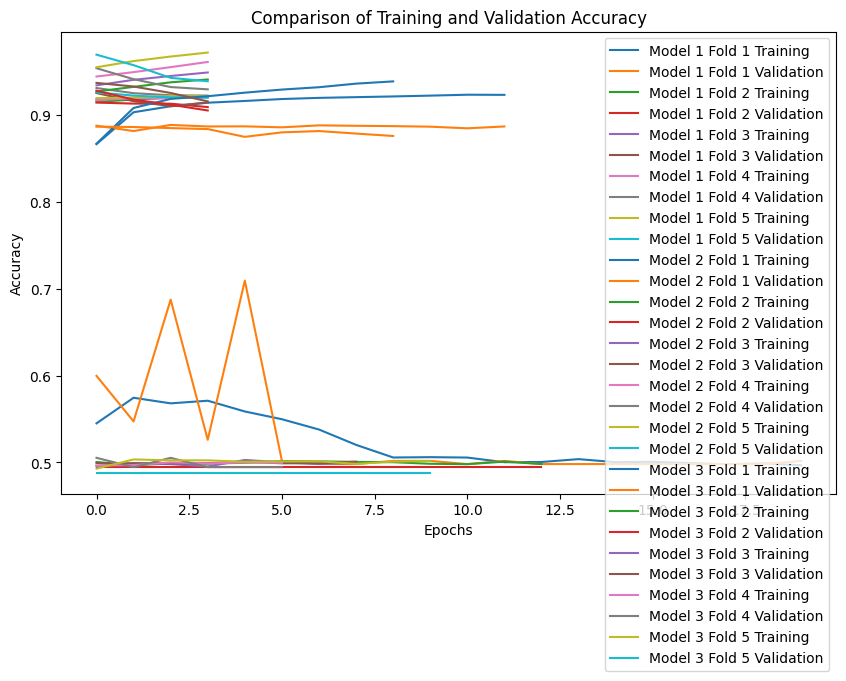

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Deep Neural Network
print("\nTraining Deep Neural Network (DNN) model...")
model1_accuracy_scores = []
model1_histories = []  # Store the history for each fold

# Define the DNN model architecture
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with cross-validation
start_time = time.time()
epochs = 20
kf = KFold(n_splits=5)
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model1.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model1_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model1.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 2: RMSProp with your choice of hyper parameters
print("\nTraining Deep Neural Network (DNN) model with RMSProp with your choice of hyper parameters...")
model2_histories = []  # Store the history for each fold

# Define the DNN model architecture
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001, rho=0.9), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model2.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model2_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 3: Adam with your choice of hyper parameters
print("\nTraining Deep Neural Network (DNN) model with Adam with your choice of hyper parameters...")
model3_accuracy_scores = []
model3_histories = []  # Store the history for each fold

# Define the DNN model architecture
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]
    
    # Train the model for each fold
    fold_history = model3.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model3_histories.append(fold_history.history)
    
    # Evaluate the model on the validation set
    _, accuracy = model3.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)
    
    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Plot the comparison of training and validation accuracy for all models
plt.figure(figsize=(10, 6))

# Plot Model 1
for i, history in enumerate(model1_histories):
    plt.plot(history['accuracy'], label=f"Model 1 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 1 Fold {i+1} Validation")

# Plot Model 2
for i, history in enumerate(model2_histories):
    plt.plot(history['accuracy'], label=f"Model 2 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 2 Fold {i+1} Validation")

# Plot Model 3
for i, history in enumerate(model3_histories):
    plt.plot(history['accuracy'], label=f"Model 3 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 3 Fold {i+1} Validation")

plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 11. Conclusion - Score: 1 mark
Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.